In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
rm -rf "/content/dataset"

In [ ]:
!unzip "/content/drive/MyDrive/TFM/dataset.zip" -d "/content/dataset" > /dev/null 2>&1

In [3]:
# Rutas importantes
dataset_path = '/content/dataset/dataset'
models_path = '/content/drive/MyDrive/TFM/models'

img_type = 'tab'
model_name = f'{img_type}'

In [ ]:
file_name_galaxias = f"galaxias_10000_extended.csv"
file_name_estrellas= f"estrellas_10000_extended.csv"

df_galaxias = pd.read_csv(f"{dataset_path}/fotometria/conformed/{file_name_galaxias}", index_col=False).sort_values("id",ascending=True)
df_estrellas = pd.read_csv(f"{dataset_path}/fotometria/conformed/{file_name_estrellas}", index_col=False).sort_values("id",ascending=True)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_all = pd.concat([df_estrellas,df_galaxias],axis=0).drop(["ra","dec","flags_r","id"], axis=1)

y = df_all["label"].values
# X_tabular = pd.DataFrame(scaler.fit_transform(df_all.drop(["label"],axis=1)),columns=df_all.drop(["label"],axis=1).columns)

X_tabular = scaler.fit_transform(df_all.drop(["label"],axis=1))


In [ ]:
# Generar una permutación aleatoria
np.random.seed(15)
perm = np.random.permutation(len(y))

# Aplicar la misma permutación a ambos arrays
X_tabular_shuffled = X_tabular[perm]
y_shuffled = y[perm]

train_per = int(round(len(y)*0.7))
valid_per = int(round(len(y)*0.15))
test_per = int(round(len(y)*0.15))

X_train, y_train = X_tabular_shuffled[:train_per], y_shuffled[:train_per]
X_valid, y_valid = X_tabular_shuffled[train_per:train_per + valid_per], y_shuffled[train_per:train_per + valid_per]
X_test, y_test = X_tabular_shuffled[train_per + valid_per:], y_shuffled[train_per + valid_per:]

In [ ]:
print(np.array(np.unique(y_train, return_counts=True)).T)
print(np.array(np.unique(y_valid, return_counts=True)).T)
print(np.array(np.unique(y_test, return_counts=True)).T)

[[   0 6971]
 [   1 7029]]
[[   0 1502]
 [   1 1498]]
[[   0 1527]
 [   1 1473]]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 250)            │         4,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       125,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │       501,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,256,501 (4.79 MB)

 Trainable params: 1,256,501 (4.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 23s 38ms/step - accuracy: 0.5354 - auc: 0.5596 - loss: 0.8384 - val_accuracy: 0.6717 - val_auc: 0.8027 - val_loss: 0.7074 - learning_rate: 1.0000e-04
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6879 - auc: 0.7602 - loss: 0.6901 - val_accuracy: 0.8487 - val_auc: 0.9494 - val_loss: 0.4856 - learning_rate: 1.0000e-04
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7909 - auc: 0.8799 - loss: 0.5387 - val_accuracy: 0.8400 - val_auc: 0.9654 - val_loss: 0.4363 - learning_rate: 1.0000e-04
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8364 - auc: 0.9210 - loss: 0.4510 - val_accuracy: 0.8907 - val_auc: 0.9687 - val_loss: 0.3434 - learning_rate: 1.0000e-04
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8630 - auc: 0.9408 - loss: 0.3973 - val_accuracy: 0.8760 - val_auc: 0.9696 - val_loss: 0.3727 - learning_rate: 1.0000e-04
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accu

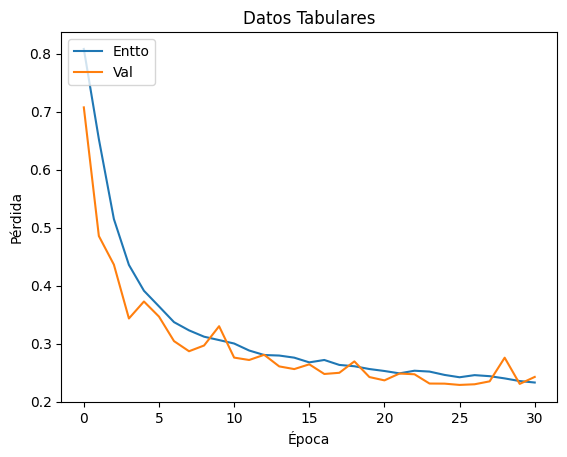

In [ ]:
# Modelo únicamente con datos tabulares
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models, Input
from keras import regularizers
from tensorflow.keras.optimizers import SGD, Nadam, Adam, AdamW
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.layers import Dense, Dropout

lr_schedule = PolynomialDecay(
    initial_learning_rate=1e-5,  # Más bajo inicialmente
    end_learning_rate=1e-6,
    decay_steps=1000)

model_tab = Sequential()
model_tab.add(Input(shape=(15,)))
model_tab.add(Dense(250, activation='relu'))
model_tab.add(Dropout(0.25))
model_tab.add(Dense(500, activation='relu', kernel_regularizer=regularizers.L2(1e-4)))
model_tab.add(Dropout(0.25))
model_tab.add(Dense(1000, activation='relu', kernel_regularizer=regularizers.L2(1e-4)))
model_tab.add(Dropout(0.25))
model_tab.add(Dense(500, activation='relu', kernel_regularizer=regularizers.L2(1e-4)))
model_tab.add(Dropout(0.25))
model_tab.add(Dense(250, activation='relu'))
model_tab.add(Dropout(0.25))
model_tab.add(Dense(1, activation='sigmoid'))


# Compilar
# optimizer = SGD(learning_rate=0.01, momentum=0.9)
# optimizer = Nadam()
optimizer = Adam(learning_rate=1e-4)
# optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-4)

model_tab.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

model_tab.summary()

from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy',      # Métrica a monitorear (puede ser 'val_accuracy', 'val_auc', etc.)
    patience=10,              # Número de epochs sin mejora antes de detener
    restore_best_weights=True,  # Restaura los pesos del mejor epoch
    verbose=1                # Muestra un mensaje cuando se detiene
)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

history = model_tab.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_valid, y_valid), callbacks=[lr_scheduler,early_stopping])

model_tab.save(f"{models_path}/{model_name}.keras")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Datos Tabulares')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entto', 'Val'], loc='upper left')
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.9275 - auc: 0.9779 - loss: 0.2153
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
              precision    recall  f1-score   support

   Estrellas       0.91      0.93      0.92      1527
    Galaxias       0.92      0.91      0.92      1473

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



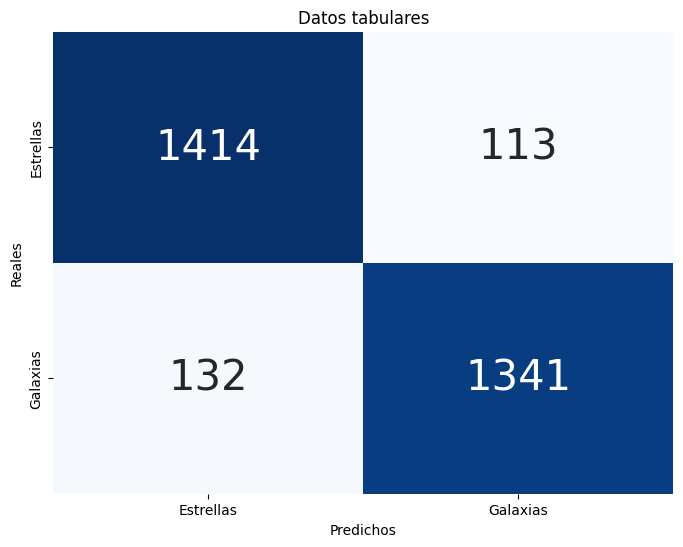

In [ ]:
from tensorflow.keras.models import load_model

model = load_model(
    f"{models_path}/{model_name}.keras"
)

model.evaluate(X_test, y_test)

# Predicciones del modelo:
y_pred_probs = model.predict(X_test)
y_pred_labels = list(map(lambda x: 0 if x < 0.5 else 1, y_pred_probs))

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels, target_names=["Estrellas","Galaxias"],))

import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=["Estrellas","Galaxias"], yticklabels=["Estrellas","Galaxias"], cmap='Blues', cbar=False, annot_kws={'size': 30})
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.title('Datos tabulares')
plt.show()

In [ ]:
df_pred = pd.DataFrame(X_test,columns=df_all.columns.drop("label"))
df_pred["y_real"] = y_test
df_pred["y_pred"] = y_pred_labels

df_wrong = df_pred[df_pred["y_real"] != df_pred["y_pred"]]
df_well = df_pred[df_pred["y_real"] == df_pred["y_pred"]]

display(df_wrong.groupby(["y_real","y_pred"]).mean())
display(df_well.groupby(["y_real","y_pred"]).mean())

,,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z
y_real,y_pred,,,,,,,,,,,,,,,
0,1,0.745154,0.750826,0.694945,0.683338,0.767711,0.617421,0.636767,0.658193,0.437167,0.541750,0.013564,0.001142,0.000748,0.051272,0.018124
1,0,0.741172,0.747269,0.699603,0.683742,0.768167,0.624928,0.639686,0.670837,0.445508,0.552241,0.013448,0.001244,0.000770,0.051137,0.018040


,,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z
y_real,y_pred,,,,,,,,,,,,,,,
0,0,0.661498,0.616952,0.568714,0.550555,0.622983,0.552711,0.531381,0.550953,0.359197,0.447073,0.022918,0.015882,0.020217,0.070605,0.031724
1,1,0.712378,0.710222,0.663794,0.653626,0.731819,0.568692,0.574801,0.593768,0.395064,0.494699,0.014582,0.002391,0.002707,0.053391,0.019679


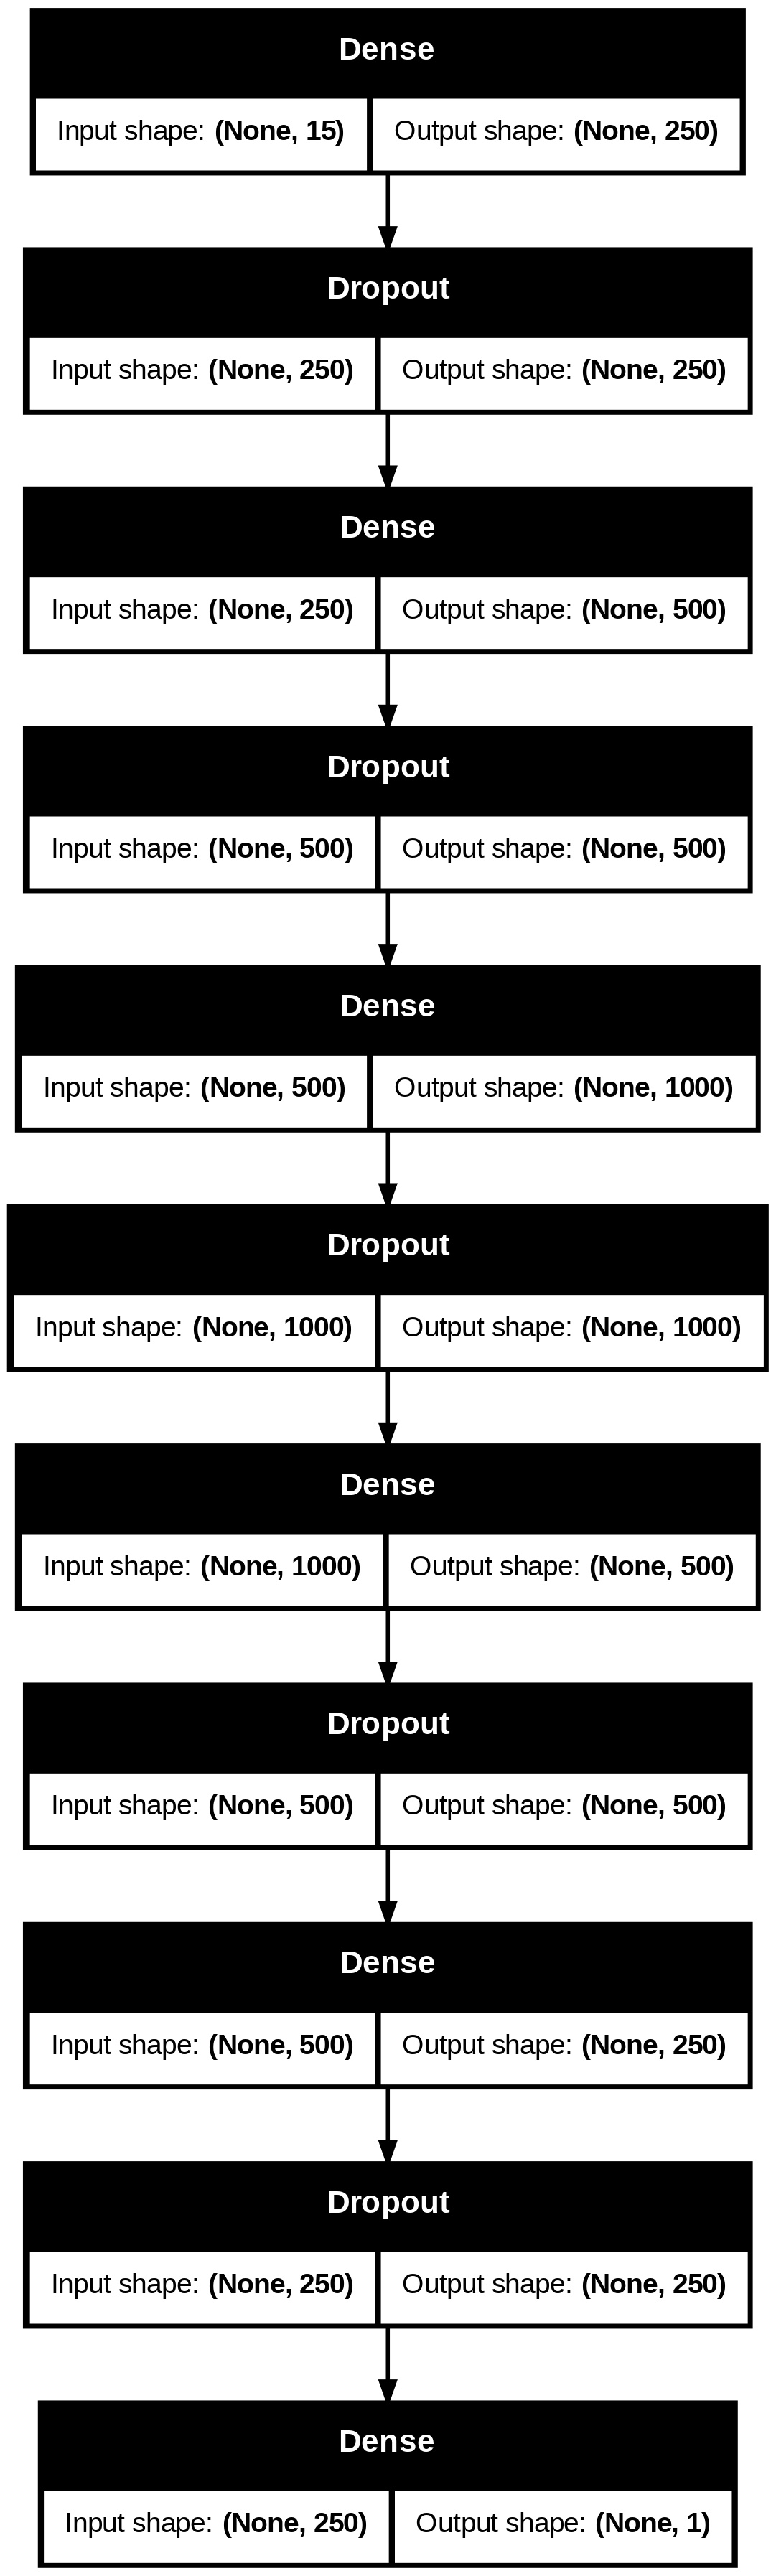

In [4]:
from tensorflow.keras.models import load_model
from keras.saving import register_keras_serializable
from keras.utils import plot_model

@register_keras_serializable()
def channel_avg(x):
    return tf.reduce_mean(x, axis=3, keepdims=True)

@register_keras_serializable()
def channel_max(x):
    return tf.reduce_max(x, axis=3, keepdims=True)

@register_keras_serializable()
def output_shape(input_shape):
    return (input_shape[0], input_shape[1], input_shape[2], 1)

model = load_model(
    f"{models_path}/{model_name}.keras",
    custom_objects={
        "channel_avg": channel_avg,
        "channel_max": channel_max,
        "output_shape": output_shape
    }
)

dot_img_file = f'{models_path}/{model_name}.png'
plot_model(model, to_file=dot_img_file, show_shapes=True)